In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [ ]:
df = pd.read_csv('chamados.csv')
df['hr_chamado'] = pd.to_datetime(df['hr_chamado'])
df.head()

,id_chamado,nivel_chamado,status_chamado,hr_chamado,tipo_chamado,endereco_chamado,id_usuario,nm_abriu_chamado,tel_contato,descricao,regiao_chamado
0,1001,Difícil,equipe no local,2025-06-03 15:12:44,Árvore caída na pista,"Rua Augusta, 637 - Jardim Paulista, São Paulo ...",254,Arthur Ribeiro,(11) 97988-1356,Árvore grande caiu na pista bloqueando o trâns...,Zona Sul
1,1002,Moderado,pendente,2025-06-03 15:30:12,Alagamento de via pública,"Rua João de Deus, 702 - Santa Cecília, São Pau...",775,Isabela Costa,(11) 93006-5013,Pista alagada com fluxo intenso de veículos pa...,Centro
2,1003,Difícil,solucionado,2025-06-03 15:45:27,Queda de poste,"Rua Oscar Freire, 258 - Parada Inglesa, São Pa...",1,Jorge Santos,(11) 96552-4098,Poste elétrico caiu com fiação exposta. Equipe...,Zona Norte
3,1004,Simples,pendente,2025-06-03 16:01:55,Queda de energia elétrica,"Avenida Paulista, 5 - Penha, São Paulo - SP",313,Carla Reis,(11) 96025-3417,Queda de energia em residência após chuva fort...,Zona Leste
4,1005,Difícil,equipe a caminho,2025-06-03 16:20:03,Telhado danificado,"Rua Marechal Deodoro, 497 - Itaim Bibi, São Pa...",350,Vinicius Melo,(11) 94102-4222,Telhado comprometido com ventos fortes; há ris...,Zona Sul


In [ ]:
def filtrar_dados(id_chamado=None, nivel_chamado=None, status_chamado=None,
                  tipo_chamado=None, regiao_chamado=None, hr_chamado=None):
    filtered_df = df.copy()

    if id_chamado:
        filtered_df = filtered_df[filtered_df['id_chamado'].astype(str).str.contains(id_chamado, case=False)]
    if nivel_chamado:
        filtered_df = filtered_df[filtered_df['nivel_chamado'].str.contains(nivel_chamado, case=False, na=False)]
    if status_chamado:
        filtered_df = filtered_df[filtered_df['status_chamado'].str.contains(status_chamado, case=False, na=False)]
    if tipo_chamado:
        filtered_df = filtered_df[filtered_df['tipo_chamado'].str.contains(tipo_chamado, case=False, na=False)]
    if regiao_chamado:
        filtered_df = filtered_df[filtered_df['regiao_chamado'].str.contains(regiao_chamado, case=False, na=False)]
    if hr_chamado:
        try:
            hr_formatada = pd.to_datetime(hr_chamado)
            filtered_df = filtered_df[filtered_df['hr_chamado'].dt.date == hr_formatada.date()]
        except:
            pass

    return filtered_df

In [ ]:
id_input = widgets.Text(placeholder='ID do Chamado', description='ID:')
nivel_input = widgets.Text(placeholder='Nível', description='Nível:')
status_input = widgets.Text(placeholder='Status', description='Status:')
tipo_input = widgets.Text(placeholder='Tipo', description='Tipo:')
regiao_input = widgets.Text(placeholder='Região', description='Região:')
hora_input = widgets.DatePicker(description='Data')

output = widgets.Output()

def on_value_change(change):
    with output:
        output.clear_output()
        filtered = filtrar_dados(
            id_chamado=id_input.value,
            nivel_chamado=nivel_input.value,
            status_chamado=status_input.value,
            tipo_chamado=tipo_input.value,
            regiao_chamado=regiao_input.value,
            hr_chamado=hora_input.value
        )
        print(filtered.to_string())

id_input.observe(on_value_change, names='value')
nivel_input.observe(on_value_change, names='value')
status_input.observe(on_value_change, names='value')
tipo_input.observe(on_value_change, names='value')
regiao_input.observe(on_value_change, names='value')
hora_input.observe(on_value_change, names='value')

display(id_input, nivel_input, status_input, tipo_input, regiao_input, hora_input, output)

#Id = 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024
#Nível = Difícil, Moderado, Simples
#Status = pendente, solucionado, equipe a caminho, equipe no local
#Tipo = Árvore caída na pista, Alagamento de via pública, Queda de poste, Queda de energia elétrica, Telhado danificado, Rua bloqueada por destelhamento, Inundação residencial, Ilhamento de veículo
#Região = Zona Sul, Centro, Zona Norte, Zona Leste, Zona Oeste

Text(value='', description='ID:', placeholder='ID do Chamado')

Text(value='', description='Nível:', placeholder='Nível')

Text(value='', description='Status:', placeholder='Status')

Text(value='', description='Tipo:', placeholder='Tipo')

Text(value='', description='Região:', placeholder='Região')

DatePicker(value=None, description='Data')

Output()

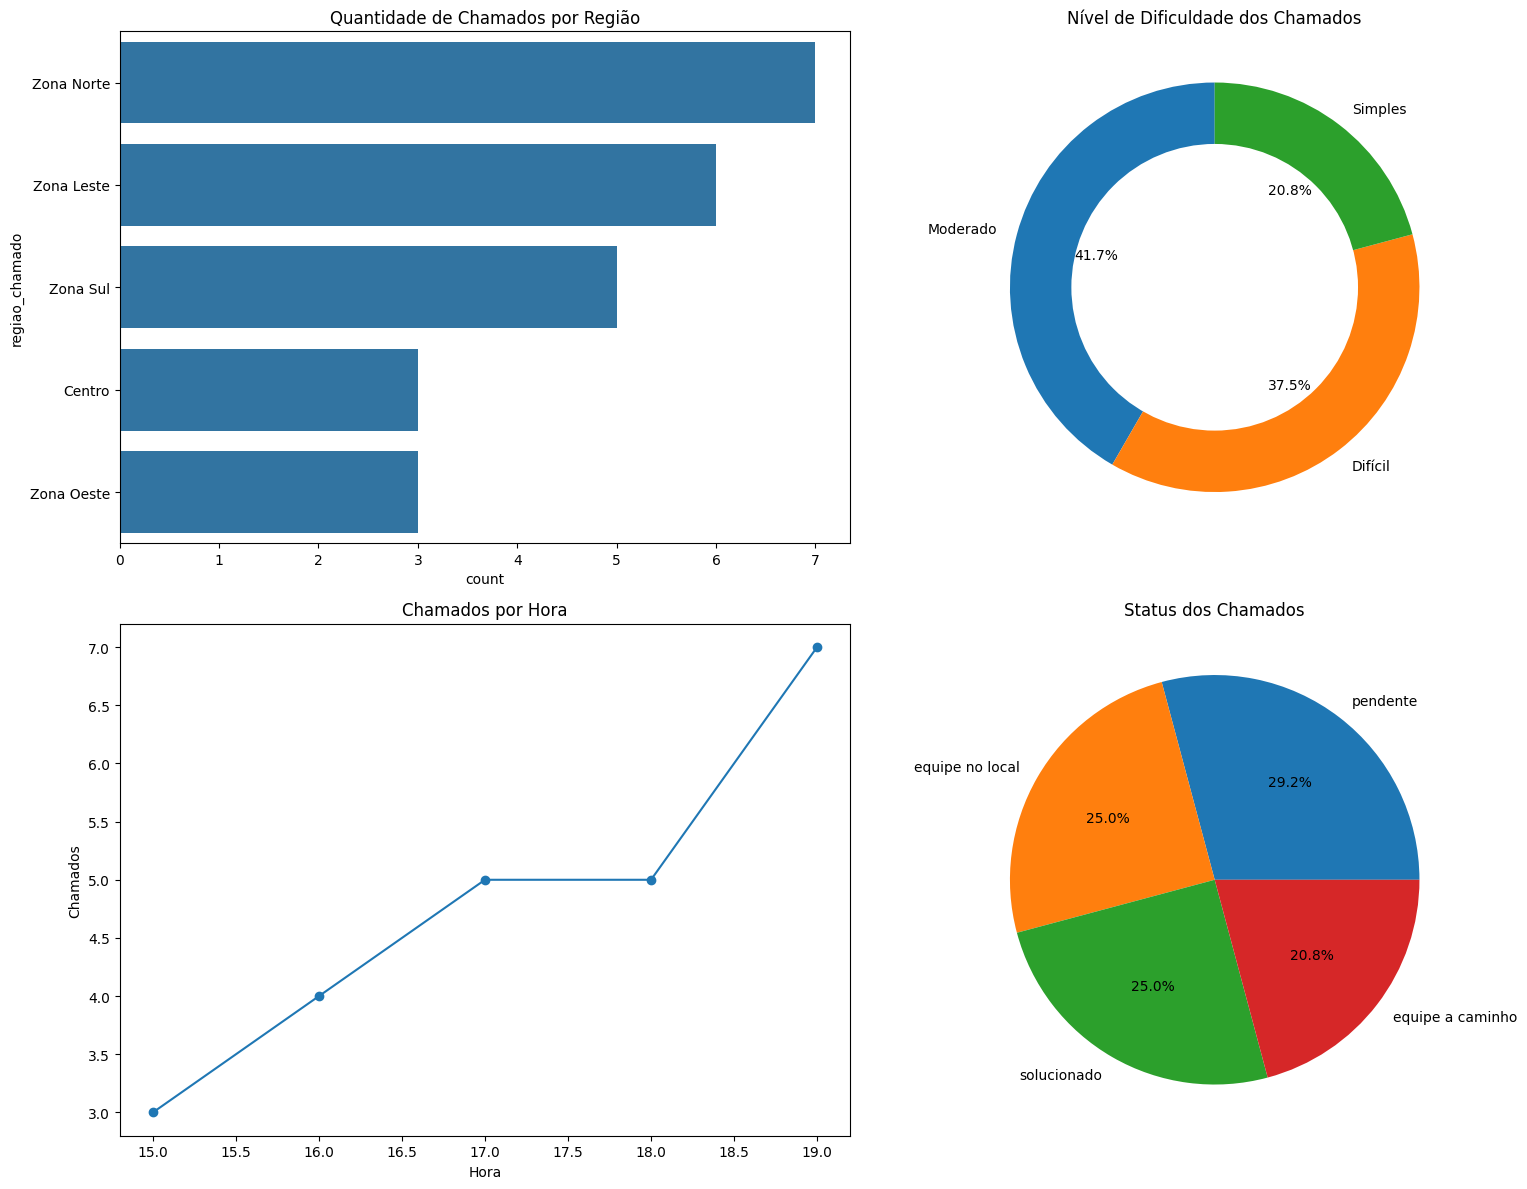

In [ ]:
def plot_graficos():
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Gráfico de Barras - Região
    sns.countplot(data=df, y='regiao_chamado', order=df['regiao_chamado'].value_counts().index, ax=axs[0, 0])
    axs[0, 0].set_title("Quantidade de Chamados por Região")

    # Gráfico Donut - Nível de Dificuldade
    nivel_counts = df['nivel_chamado'].value_counts()
    axs[0, 1].pie(nivel_counts, labels=nivel_counts.index, autopct='%1.1f%%', startangle=90)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axs[0, 1].add_artist(centre_circle)
    axs[0, 1].set_title("Nível de Dificuldade dos Chamados")

    # Gráfico de Linha - Hora dos Chamados
    df['hora'] = df['hr_chamado'].dt.hour
    chamados_por_hora = df.groupby('hora').size()
    chamados_por_hora.plot(kind='line', marker='o', ax=axs[1, 0])
    axs[1, 0].set_xlabel("Hora")
    axs[1, 0].set_ylabel("Chamados")
    axs[1, 0].set_title("Chamados por Hora")

    # Gráfico de Pizza - Status
    status_counts = df['status_chamado'].value_counts()
    axs[1, 1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
    axs[1, 1].set_title("Status dos Chamados")

    plt.tight_layout()
    plt.show()

plot_graficos()